# PGA Tour Data Analysis - Initial Exploration

This notebook performs initial exploratory data analysis on the PGA Tour dataset (2015-2022).

In [17]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for better visualizations
plt.style.use('seaborn')
sns.set_palette('husl')

/var/folders/br/rct9ypdj6zg6sq91wz9ycqzm0000gn/T/ipykernel_23344/1761336306.py:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [18]:
# Load the dataset
df = pd.read_csv('../initial_set/ASA All PGA Raw Data - PGA Tour Golf Data - (2015-2022).csv')

# Display basic information about the dataset
print("Dataset Shape:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nData Types:\n", df.dtypes)

Dataset Shape: (36864, 37)

Columns: ['Player_initial_last', 'tournament id', 'player id', 'hole_par', 'strokes', 'hole_DKP', 'hole_FDP', 'hole_SDP', 'streak_DKP', 'streak_FDP', 'streak_SDP', 'n_rounds', 'made_cut', 'pos', 'finish_DKP', 'finish_FDP', 'finish_SDP', 'total_DKP', 'total_FDP', 'total_SDP', 'player', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'tournament name', 'course', 'date', 'purse', 'season', 'no_cut', 'Finish', 'sg_putt', 'sg_arg', 'sg_app', 'sg_ott', 'sg_t2g', 'sg_total']

Data Types:
 Player_initial_last     object
tournament id            int64
player id                int64
hole_par                 int64
strokes                  int64
hole_DKP               float64
hole_FDP               float64
hole_SDP                 int64
streak_DKP               int64
streak_FDP             float64
streak_SDP               int64
n_rounds                 int64
made_cut                 int64
pos                    float64
finish_DKP               int64
finish_FDP               i

In [19]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:")
print(missing_values[missing_values > 0])

Missing Values:
pos           15547
Unnamed: 2    36864
Unnamed: 3    36864
Unnamed: 4    36864
Finish         7683
sg_putt        7684
sg_arg         7684
sg_app         7684
sg_ott         7684
sg_t2g         7684
sg_total       7683
dtype: int64


In [20]:
# Basic statistics for numerical columns
print("Basic Statistics:")
df.describe()

Basic Statistics:


,tournament id,player id,hole_par,strokes,hole_DKP,hole_FDP,hole_SDP,streak_DKP,streak_FDP,streak_SDP,...,Unnamed: 4,purse,season,no_cut,sg_putt,sg_arg,sg_app,sg_ott,sg_t2g,sg_total
count,3.686400e+04,3.686400e+04,36864.000000,36864.000000,36864.000000,36864.000000,36864.000000,36864.000000,36864.000000,36864.000000,...,0.0,36864.000000,36864.000000,36864.000000,29180.000000,29180.000000,29180.000000,29180.000000,29180.000000,29181.000000
mean,2.331807e+08,7.979041e+04,225.547065,224.114502,50.130249,44.375789,49.323703,1.764052,7.686844,1.683485,...,NaN,7.529612,2018.539686,0.065294,-0.121005,-0.040744,-0.101759,-0.045896,-0.188346,-0.305491
std,1.979221e+08,5.753816e+05,70.295590,66.789007,24.025854,24.153313,22.202915,2.846552,7.252924,2.668202,...,NaN,2.192712,2.213050,0.247047,1.119451,0.727315,1.119763,0.808139,1.640817,1.966669
min,2.230000e+03,5.000000e+00,70.000000,66.000000,-2.500000,-21.400000,-11.000000,0.000000,0.000000,0.000000,...,NaN,3.000000,2015.000000,0.000000,-5.990000,-6.430000,-9.250000,-7.740000,-13.950000,-13.670000
25%,2.696000e+03,1.170000e+03,143.000000,146.000000,27.000000,22.600000,28.000000,0.000000,0.800000,0.000000,...,NaN,6.400000,2017.000000,0.000000,-0.770000,-0.450000,-0.740000,-0.450000,-1.080000,-1.370000
50%,4.010565e+08,3.793000e+03,280.000000,272.000000,53.500000,46.100000,55.000000,0.000000,6.400000,0.000000,...,NaN,7.100000,2019.000000,0.000000,-0.040000,0.000000,0.000000,0.050000,-0.010000,-0.160000
75%,4.012195e+08,6.151000e+03,286.000000,281.000000,69.000000,64.000000,69.000000,3.000000,12.400000,3.000000,...,NaN,8.700000,2021.000000,0.000000,0.630000,0.420000,0.640000,0.480000,0.920000,1.060000
max,4.013669e+08,4.845309e+06,292.000000,325.000000,174.000000,134.700000,107.000000,23.000000,43.600000,22.000000,...,NaN,20.000000,2022.000000,1.000000,4.430000,3.170000,4.670000,2.770000,6.300000,8.520000


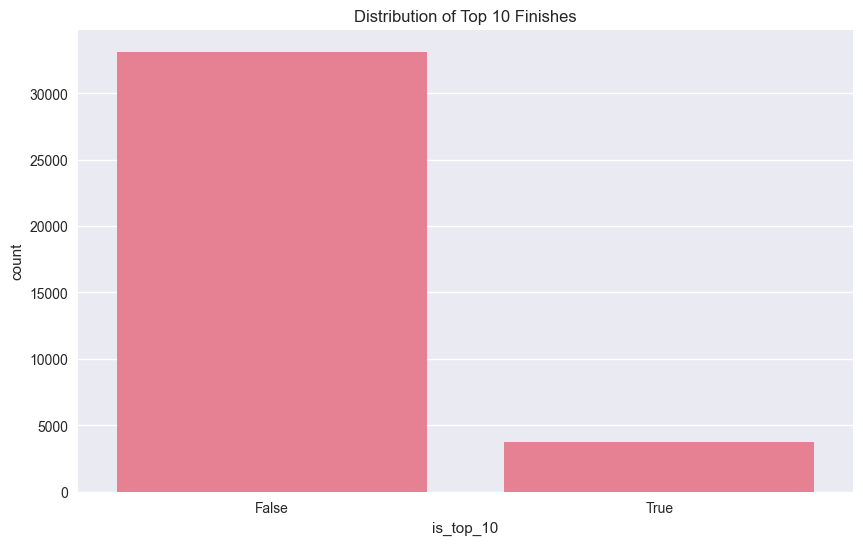

In [13]:
# Create target variable (Top 10 finish)
df['is_top_10'] = df['pos'] <= 10

# Distribution of Top 10 finishes
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='is_top_10')
plt.title('Distribution of Top 10 Finishes')
plt.show()

In [25]:
# Analyze potential features
numerical_columns = df.select_dtypes(include=[np.number]).columns

# Correlation with target variable
correlations = df[numerical_columns].corr()['is_top_10'].sort_values(ascending=False)
print("\nCorrelations with Top 10 Finish:")
print(correlations)


Correlations with Top 10 Finish:
is_top_10        1.000000
finish_SDP       0.894701
finish_FDP       0.845141
finish_DKP       0.830916
total_FDP        0.539302
total_DKP        0.529615
total_SDP        0.499401
sg_total         0.469473
streak_FDP       0.445700
hole_FDP         0.444672
hole_DKP         0.420205
streak_DKP       0.418526
hole_SDP         0.408550
sg_t2g           0.373903
streak_SDP       0.366534
sg_app           0.286351
sg_putt          0.278401
n_rounds         0.278237
hole_par         0.277249
made_cut         0.268944
strokes          0.240176
sg_ott           0.207048
sg_arg           0.172449
no_cut           0.084520
purse            0.007975
player id       -0.015706
tournament id   -0.022949
season          -0.024412
pos             -0.478619
Unnamed: 2            NaN
Unnamed: 3            NaN
Unnamed: 4            NaN
Name: is_top_10, dtype: float64


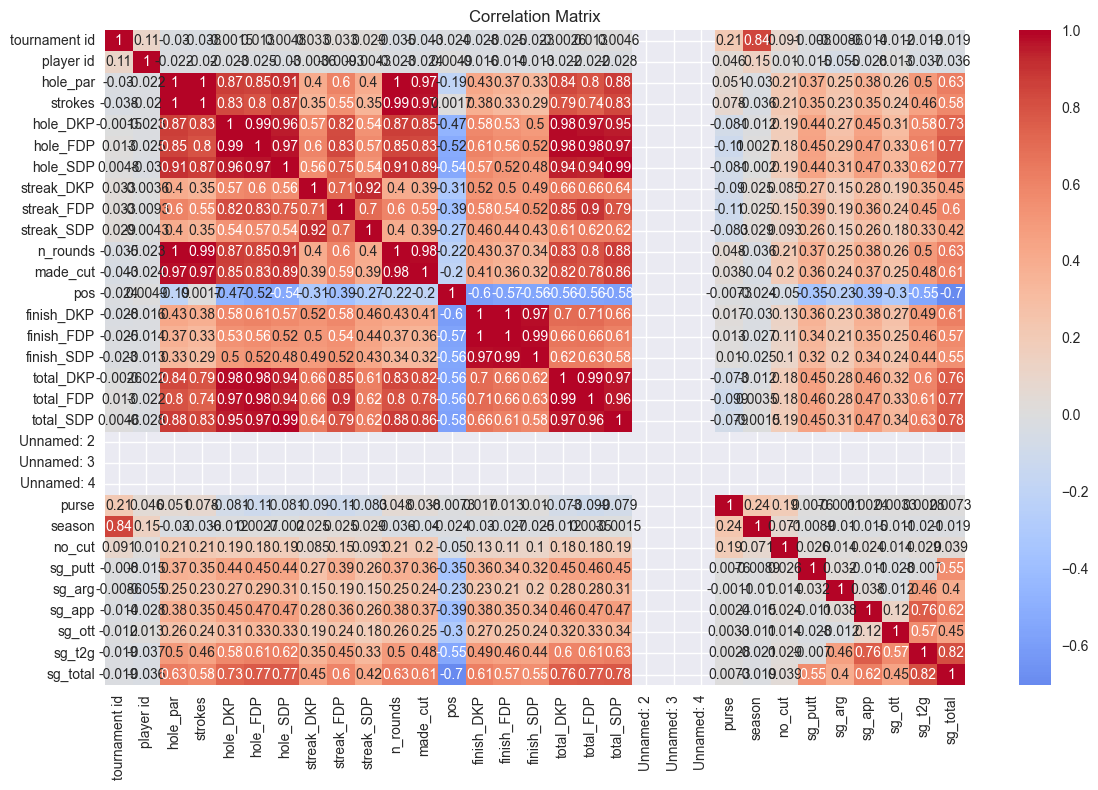

In [22]:
# Visualize correlations
plt.figure(figsize=(12, 8))
sns.heatmap(df[numerical_columns].corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

In [23]:
# Create target variable (Top 10 finish)
df['is_top_10'] = (df['pos'] <= 10).astype(int)

# Display distribution of top 10 finishes
print("\nDistribution of Top 10 Finishes:")
print(df['is_top_10'].value_counts(normalize=True))


Distribution of Top 10 Finishes:
is_top_10
0    0.899306
1    0.100694
Name: proportion, dtype: float64


In [24]:
# Calculate correlations with target variable
numerical_columns = df.select_dtypes(include=[np.number]).columns
correlations = df[numerical_columns].corr()['is_top_10'].sort_values(ascending=False)
print("\nCorrelations with Top 10 Finish:")
print(correlations)


Correlations with Top 10 Finish:
is_top_10        1.000000
finish_SDP       0.894701
finish_FDP       0.845141
finish_DKP       0.830916
total_FDP        0.539302
total_DKP        0.529615
total_SDP        0.499401
sg_total         0.469473
streak_FDP       0.445700
hole_FDP         0.444672
hole_DKP         0.420205
streak_DKP       0.418526
hole_SDP         0.408550
sg_t2g           0.373903
streak_SDP       0.366534
sg_app           0.286351
sg_putt          0.278401
n_rounds         0.278237
hole_par         0.277249
made_cut         0.268944
strokes          0.240176
sg_ott           0.207048
sg_arg           0.172449
no_cut           0.084520
purse            0.007975
player id       -0.015706
tournament id   -0.022949
season          -0.024412
pos             -0.478619
Unnamed: 2            NaN
Unnamed: 3            NaN
Unnamed: 4            NaN
Name: is_top_10, dtype: float64


## Initial Findings

1. Dataset Overview:
   - Number of records and features
   - Types of data available

2. Data Quality:
   - Missing values identified
   - Data types and potential conversions needed

3. Feature Analysis:
   - Most correlated features with Top 10 finish
   - Potential feature engineering opportunities

## Next Steps

1. Handle missing values
2. Create derived features
3. Prepare data for modeling